In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load data
df = pd.read_csv('../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv')

print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Employees: {len(df)}")
print(f"Total Features: {len(df.columns)}")

DATASET OVERVIEW

Dataset Shape: (1470, 35)
Total Employees: 1470
Total Features: 35


In [4]:
# Basic info from dataset 
print("\n" + "="*50)
print("DATA TYPES & MISSING VALUES")
print("="*50)
print(df.info())


DATA TYPES & MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 


In [5]:
# Target variable analysis
print("\n" + "="*50)
print("ATTRITION DISTRIBUTION")
print("="*50)
print(df['Attrition'].value_counts())
print("\nPercentage:")
print(df['Attrition'].value_counts(normalize=True) * 100)


ATTRITION DISTRIBUTION
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Percentage:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


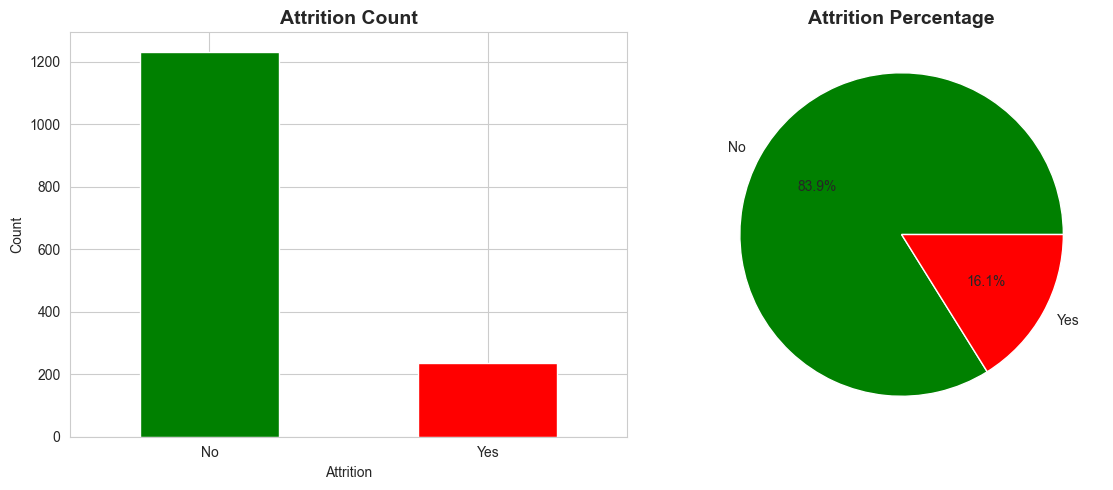


⚠️ CLASS IMBALANCE: Only 16% attrition - we'll need to handle this!


In [6]:
# Visualize
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
df['Attrition'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Attrition Count', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Pie chart
df['Attrition'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', colors=['green', 'red'])
ax[1].set_title('Attrition Percentage', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../assets/attrition_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ CLASS IMBALANCE: Only 16% attrition - we'll need to handle this!")

In [7]:
# Numerical features
print("\n" + "="*50)
print("NUMERICAL FEATURES SUMMARY")
print("="*50)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical features: {len(numerical_cols)}")
print(df[numerical_cols].describe())


NUMERICAL FEATURES SUMMARY

Numerical features: 26
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156 

In [8]:
# Categorical features
print("\n" + "="*50)
print("CATEGORICAL FEATURES")
print("="*50)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical features: {len(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


CATEGORICAL FEATURES

Categorical features: 9

Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype


KEY INSIGHTS: ATTRITION DRIVERS


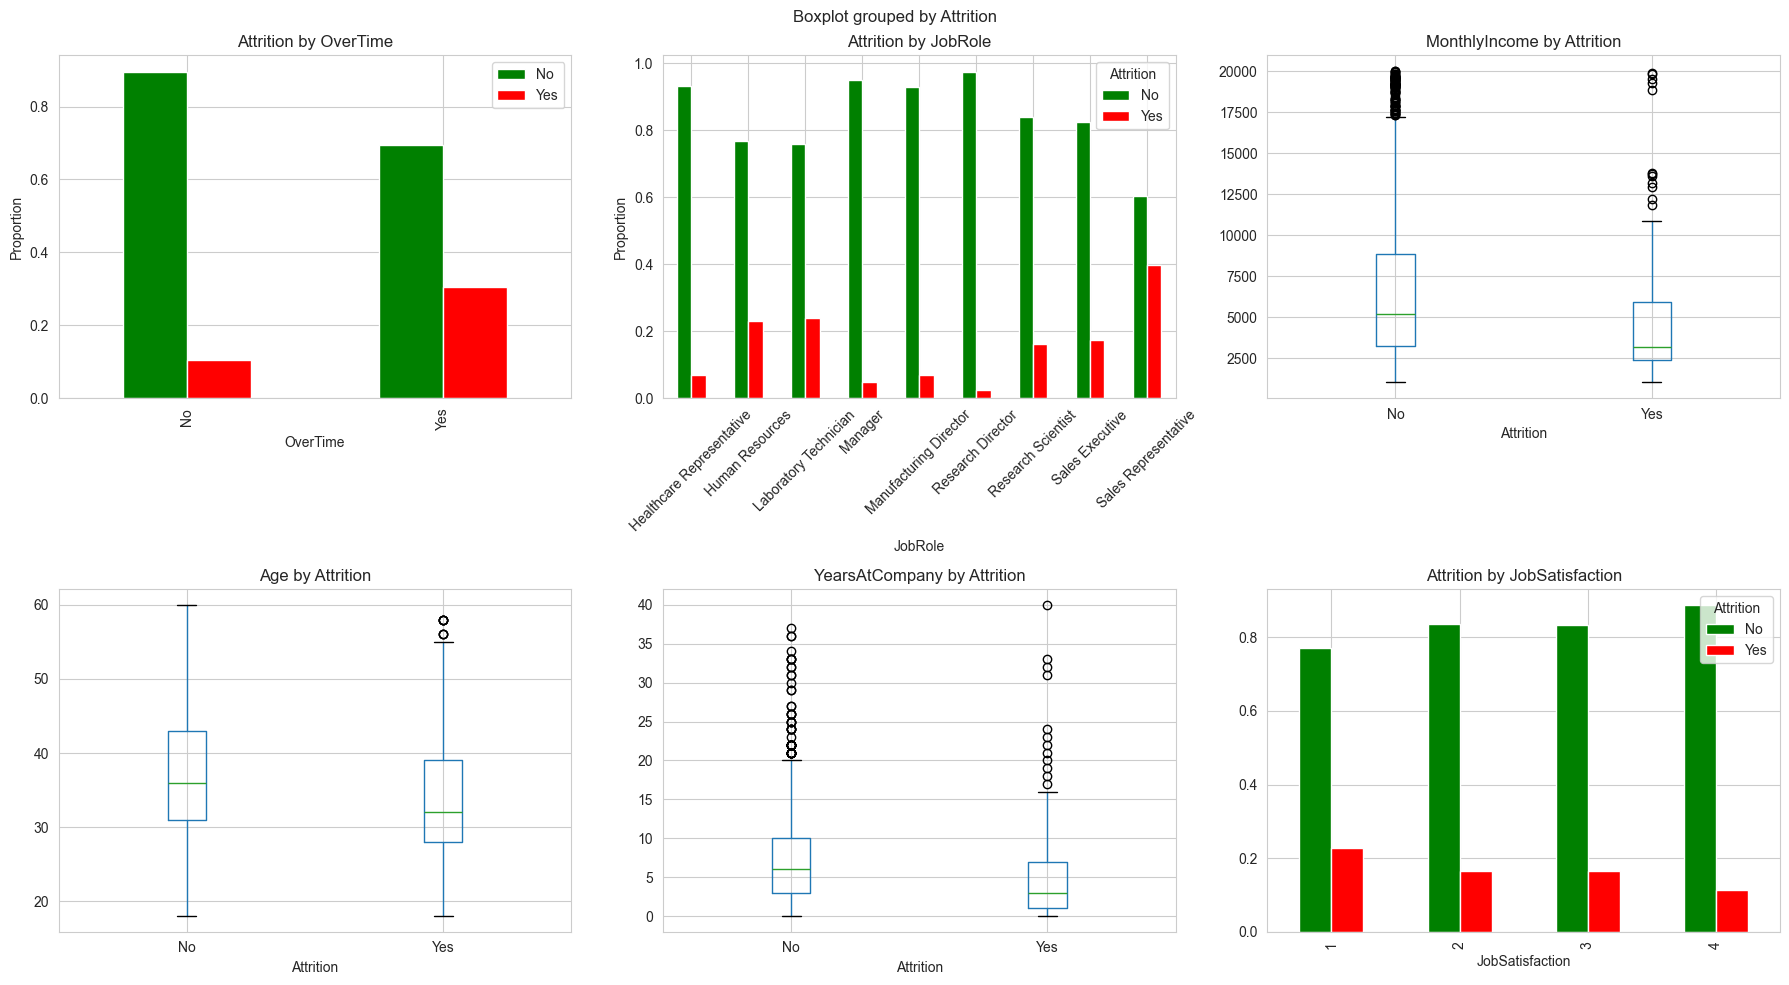

In [9]:
# Key insights - Attrition by important features
print("\n" + "="*50)
print("KEY INSIGHTS: ATTRITION DRIVERS")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Attrition by Key Features', fontsize=16, fontweight='bold')

# 1. OverTime
pd.crosstab(df['OverTime'], df['Attrition'], normalize='index').plot(
    kind='bar', ax=axes[0,0], color=['green', 'red']
)
axes[0,0].set_title('Attrition by OverTime')
axes[0,0].set_ylabel('Proportion')
axes[0,0].legend(['No', 'Yes'])

# 2. JobRole
pd.crosstab(df['JobRole'], df['Attrition'], normalize='index').plot(
    kind='bar', ax=axes[0,1], color=['green', 'red']
)
axes[0,1].set_title('Attrition by JobRole')
axes[0,1].set_ylabel('Proportion')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. MonthlyIncome
df.boxplot(column='MonthlyIncome', by='Attrition', ax=axes[0,2])
axes[0,2].set_title('MonthlyIncome by Attrition')

# 4. Age
df.boxplot(column='Age', by='Attrition', ax=axes[1,0])
axes[1,0].set_title('Age by Attrition')

# 5. YearsAtCompany
df.boxplot(column='YearsAtCompany', by='Attrition', ax=axes[1,1])
axes[1,1].set_title('YearsAtCompany by Attrition')

# 6. JobSatisfaction
pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index').plot(
    kind='bar', ax=axes[1,2], color=['green', 'red']
)
axes[1,2].set_title('Attrition by JobSatisfaction')

plt.tight_layout()
plt.savefig('../assets/attrition_drivers.png', dpi=300, bbox_inches='tight')
plt.show()


CORRELATION ANALYSIS

Features most correlated with Attrition:
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
Name: Attrition, dtype: float64


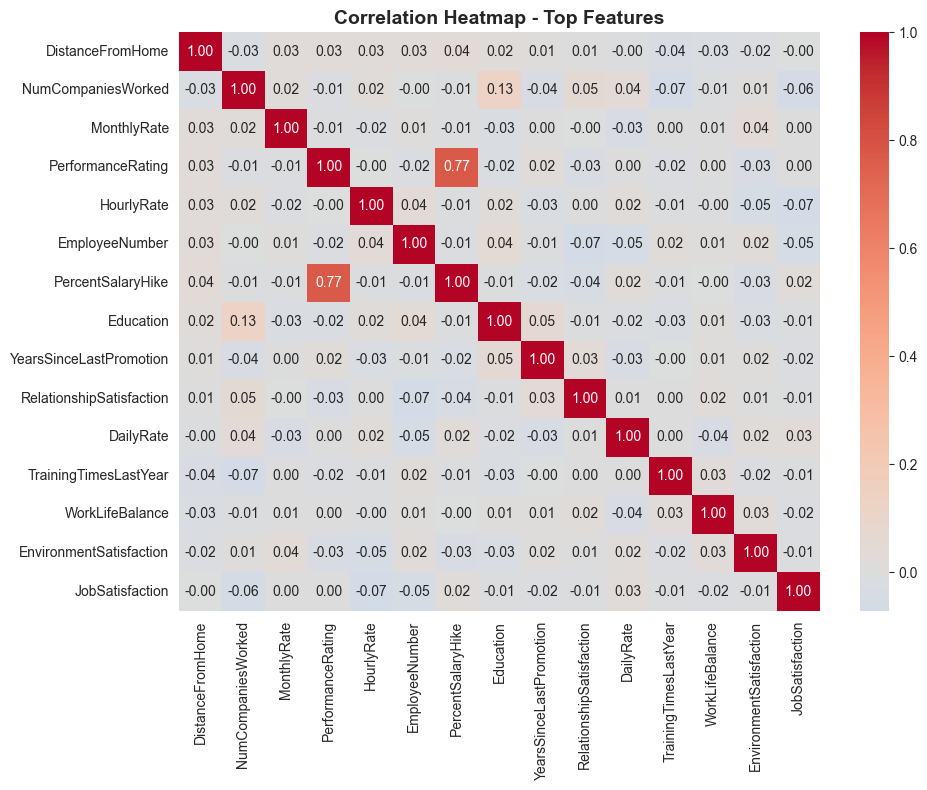

In [10]:
# Correlation analysis
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Convert Attrition to numeric
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

# Select only numerical columns
numerical_cols = df_corr.select_dtypes(include=[np.number]).columns.tolist()

# Correlation with Attrition
attrition_corr = df_corr[numerical_cols].corr()['Attrition'].sort_values(ascending=False)
print("\nFeatures most correlated with Attrition:")
print(attrition_corr[1:11])  # Top 10

# Visualize
plt.figure(figsize=(10, 8))
top_features = attrition_corr[1:16].index  # Top 15
sns.heatmap(df_corr[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Top Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../assets/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# Key findings summary
print("\n" + "="*50)
print(" KEY FINDINGS")
print("="*50)
print("""
1. SEVERE CLASS IMBALANCE: Only 16% attrition (237 Yes vs 1233 No)
   → Must use SMOTE or class weights

2. TOP ATTRITION DRIVERS:
   - OverTime: 30% attrition rate (vs 10% without overtime)
   - Low JobSatisfaction: Higher attrition
   - Sales Representative role: Highest attrition
   - Single employees: Higher attrition
   - Frequent travelers: Higher attrition

3. PROTECTIVE FACTORS:
   - Higher age → Lower attrition
   - Longer tenure → Lower attrition
   - Higher monthly income → Lower attrition
   - Stock options → Lower attrition

4. DATA QUALITY:
   - No missing values 
   - 1470 samples (smaller dataset - be careful with overfitting)
   - Mix of categorical and numerical features
   
5. FEATURE ENGINEERING OPPORTUNITIES:
   - Income-to-age ratio
   - Years since promotion ratio
   - Work-life balance score
   - Career progression rate
   - Total satisfaction score
""")


 KEY FINDINGS

1. SEVERE CLASS IMBALANCE: Only 16% attrition (237 Yes vs 1233 No)
   → Must use SMOTE or class weights

2. TOP ATTRITION DRIVERS:
   - OverTime: 30% attrition rate (vs 10% without overtime)
   - Low JobSatisfaction: Higher attrition
   - Sales Representative role: Highest attrition
   - Single employees: Higher attrition
   - Frequent travelers: Higher attrition

3. PROTECTIVE FACTORS:
   - Higher age → Lower attrition
   - Longer tenure → Lower attrition
   - Higher monthly income → Lower attrition
   - Stock options → Lower attrition

4. DATA QUALITY:
   - No missing values 
   - 1470 samples (smaller dataset - be careful with overfitting)
   - Mix of categorical and numerical features

5. FEATURE ENGINEERING OPPORTUNITIES:
   - Income-to-age ratio
   - Years since promotion ratio
   - Work-life balance score
   - Career progression rate
   - Total satisfaction score

